In [10]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from scheduler import NoiseScheduler
from utils.sinusoidal_embeddings import get_sinusoidal_embeddings

# Get data

In [11]:
batch_size = 32
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

next(iter(trainloader))[0].shape

torch.Size([32, 1, 28, 28])

# Noise Scheduler

In [ ]:
test = NoiseScheduler(1000, 0.0001, 0.02)
test_batch = next(iter(trainloader))[0]
test_noise = torch.randn(test_batch.shape)
test_t = 2
test_time_t=test.add_noise(test_batch, test_noise, test_t)

RuntimeError: shape '[32]' is invalid for input of size 1

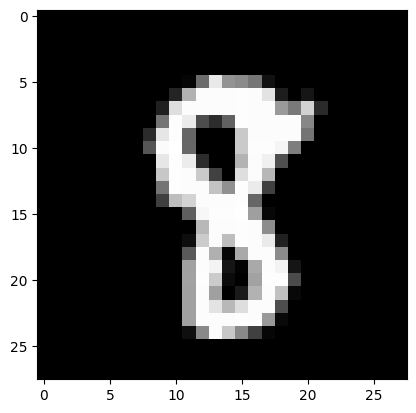

In [5]:
#plot test_batch
plt.imshow(test_x0.squeeze().numpy(), cmap='gray')
plt.show()

In [6]:
t = torch.Tensor([1, 2, 3, 4])
embs = get_sinusoidal_embeddings(t)
embs.shape

torch.Size([4, 256])

In [7]:
from model.unet import DownBlock, MidBlock, UpBlock

db1 = DownBlock(in_channels=1, out_channels=16, time_emb_dim=256)
db2 = DownBlock(in_channels=16, out_channels=32, time_emb_dim=256)

mb = MidBlock(in_channels=32, out_channels=32, time_emb_dim=256)

up1 = UpBlock(in_channels=32, out_channels=16, time_emb_dim=256)
up2 = UpBlock(in_channels=16, out_channels=8, time_emb_dim=256)

In [8]:
out_lst1, out_down1 = db1(test_x0, embs)
out_lst2, out_down2 = db2(out_down1, embs)

print(out_down2.shape)
out = mb(out_down2, embs)
print(out.shape)

out = up1(out, out_lst2, embs)
out = up2(out, out_lst1, embs)

print(out)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


torch.Size([4, 32, 7, 7])
torch.Size([4, 32, 7, 7])
torch.Size([4, 32, 14, 14]) torch.Size([4, 32, 14, 14])
torch.Size([4, 16, 28, 28]) torch.Size([4, 16, 28, 28])
tensor([[[[ 1.5774e-02, -1.2865e-02, -6.1209e-02,  ..., -3.3950e-02,
           -9.7131e-03, -1.4649e-01],
          [ 2.1030e-01,  1.5088e-01,  7.5162e-02,  ...,  2.2154e-01,
            2.2762e-01, -9.0418e-02],
          [ 3.7787e-01,  3.2100e-01,  2.2856e-01,  ...,  2.9774e-01,
            3.0593e-01, -2.2548e-02],
          ...,
          [ 9.6078e-02,  1.7267e-01,  2.0964e-01,  ...,  2.1982e-02,
            5.5575e-02, -1.5247e-01],
          [ 1.9129e-01,  2.7704e-01,  3.8985e-01,  ...,  2.9298e-01,
            1.3587e-01, -1.2831e-01],
          [ 3.7770e-02,  1.3371e-01,  1.8120e-01,  ...,  2.7934e-01,
            1.8183e-01,  2.4296e-02]],

         [[ 1.3266e-01,  1.4599e-01,  1.4633e-01,  ...,  1.2745e-01,
            8.8927e-02,  7.0944e-02],
          [ 1.0094e-03,  1.5662e-01, -7.1323e-03,  ..., -6.6567e-02,
 

In [9]:
from model.unet import Unet

unet = Unet()

out_final = unet(test_x0, t)


torch.Size([4, 256, 6, 6]) torch.Size([128, 7, 7])


RuntimeError: Tensors must have same number of dimensions: got 4 and 3

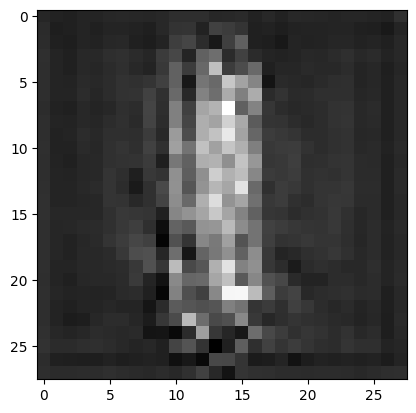

In [ ]:
plt.imshow(out[0][0].squeeze().detach().numpy(), cmap='gray')